In [32]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
data1 = pd.read_fwf(r"D:\Desktop\Fall\DATA1030\project\auto+mpg\auto-mpg.data-original", header = None, sep = '\t')
data1[['8', '9']] = data1[7].str.split('.\t', expand=True)
data1 = data1.loc[:, data1.columns != 7]
data1.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
data1.head()
data1.info()
pd.value_counts(data1['cylinders'])
data1.head()

X = data1.loc[:, data1.columns != 'mpg']
X = X.loc[:, X.columns != 'model_year']
X = X.loc[:, X.columns != 'car_name']
y = data1['mpg']
data_try = data1[data1['mpg'].notna()]
data_try.info()
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     406 non-null    float64
 2   displacement  406 non-null    float64
 3   horsepower    400 non-null    float64
 4   weight        406 non-null    float64
 5   acceleration  406 non-null    float64
 6   model_year    406 non-null    float64
 7   origin        406 non-null    object 
 8   car_name      406 non-null    object 
dtypes: float64(7), object(2)
memory usage: 28.7+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 405
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight  

,cylinders,displacement,horsepower,weight,acceleration,origin
0,8.0,307.0,130.0,3504.0,12.0,1
1,8.0,350.0,165.0,3693.0,11.5,1
2,8.0,318.0,150.0,3436.0,11.0,1
3,8.0,304.0,150.0,3433.0,12.0,1
4,8.0,302.0,140.0,3449.0,10.5,1


**EDA Part:**

In [34]:
#Check each features
for name in data1.columns:
    print(name, ": ")
    print(data1[name].describe())
    print()

mpg : 
count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

cylinders : 
count    406.000000
mean       5.475369
std        1.712160
min        3.000000
25%        4.000000
50%        4.000000
75%        8.000000
max        8.000000
Name: cylinders, dtype: float64

displacement : 
count    406.000000
mean     194.779557
std      104.922458
min       68.000000
25%      105.000000
50%      151.000000
75%      302.000000
max      455.000000
Name: displacement, dtype: float64

horsepower : 
count    400.000000
mean     105.082500
std       38.768779
min       46.000000
25%       75.750000
50%       95.000000
75%      130.000000
max      230.000000
Name: horsepower, dtype: float64

weight : 
count     406.000000
mean     2979.413793
std       847.004328
min      1613.000000
25%      2226.500000
50%      2822.500000
75%      3618.250000
max      5140.000000
Na

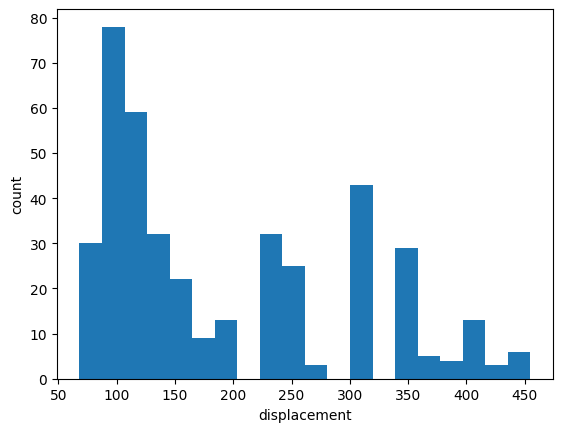

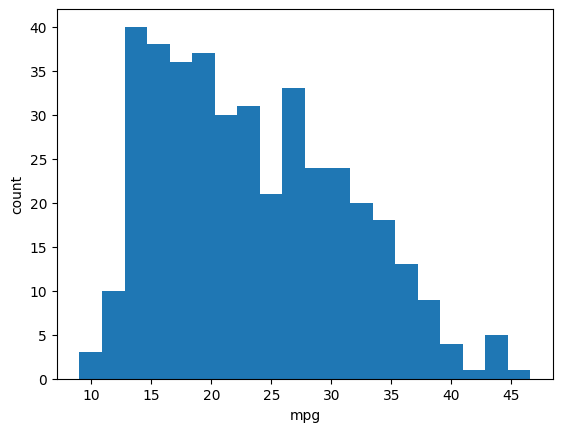

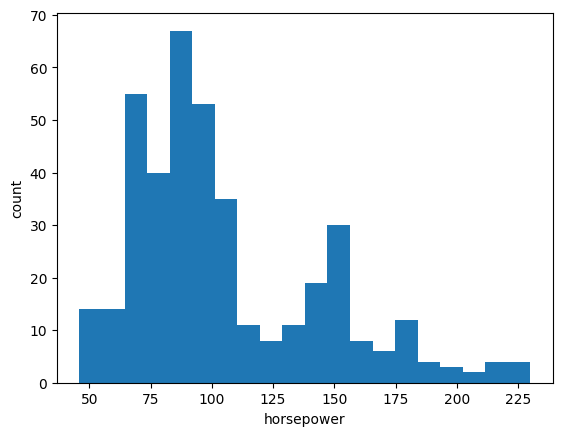

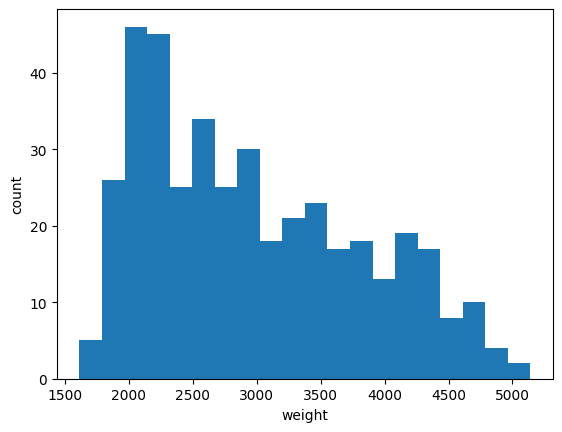

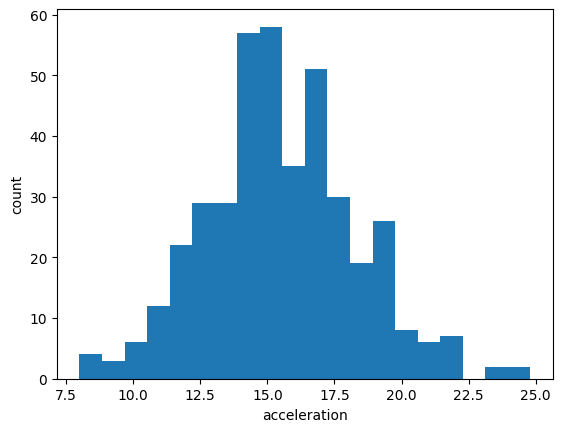

cylinders : 
cylinders
4.0    207
8.0    108
6.0     84
3.0      4
5.0      3
Name: count, dtype: int64

model_year : 
model_year
73.0    40
78.0    36
70.0    35
76.0    34
82.0    31
75.0    30
81.0    30
71.0    29
79.0    29
80.0    29
72.0    28
77.0    28
74.0    27
Name: count, dtype: int64

origin : 
origin
1    254
3     79
2     73
Name: count, dtype: int64

car_name : 
car_name
"ford pinto"             6
"ford maverick"          5
"amc matador"            5
"toyota corolla"         5
"amc hornet"             4
                        ..
"plymouth fury"          1
"buick skyhawk"          1
"chevrolet monza 2+2"    1
"ford mustang ii"        1
"chevy s-10"             1
Name: count, Length: 312, dtype: int64



In [35]:
X = X.loc[:, X.columns != 'car_name']
for name in ['displacement', 'mpg', 'horsepower', 'weight', 'acceleration']:
    data1[name].plot.hist(bins =int(np.sqrt(data1.shape[0])))   # bins = int(np.sqrt(df.shape[0])) 
                        # bins = df['age'].nunique()
    plt.xlabel(name)
    plt.ylabel('count')
    plt.show()

for name in ['cylinders', 'model_year', 'origin', 'car_name']:
    print(name, ": ")
    print(pd.value_counts(data1[name]))
    print()

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.778427 -0.831741   
cylinders    -0.775396   1.000000      0.951787    0.844158  0.895220   
displacement -0.804203   0.951787      1.000000    0.898326  0.932475   
horsepower   -0.778427   0.844158      0.898326    1.000000  0.866586   
weight       -0.831741   0.895220      0.932475    0.866586  1.000000   
acceleration  0.420289  -0.522452     -0.557984   -0.697124 -0.430086   
model_year    0.579267  -0.360762     -0.381714   -0.424419 -0.315389   
origin        0.563450  -0.567478     -0.613056   -0.460033 -0.584109   

              acceleration  model_year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.522452   -0.360762 -0.567478  
displacement     -0.557984   -0.381714 -0.613056  
horsepower       -0.697124   -0.424419 -0.460033  
weight           -0.430086   -0.315389 -0.584109  
acceleration      1.000000    0.3019

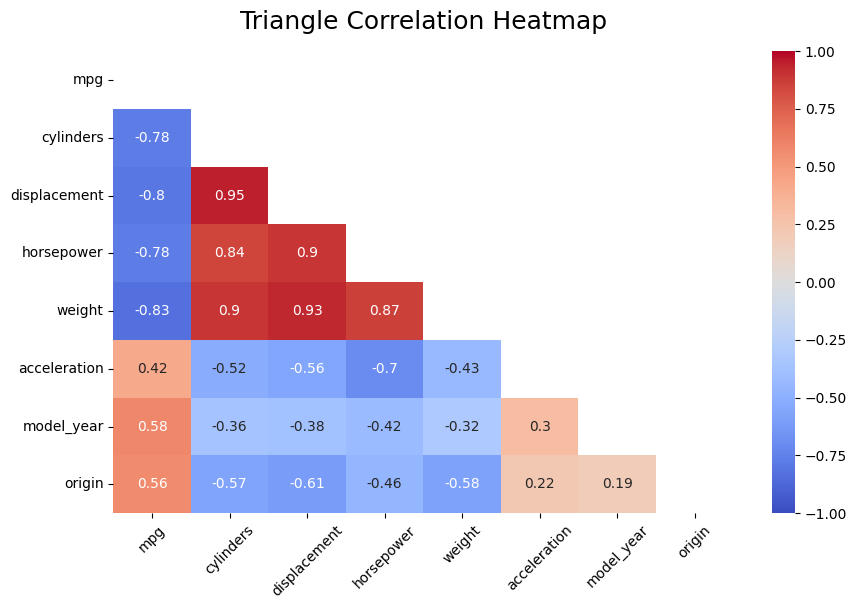

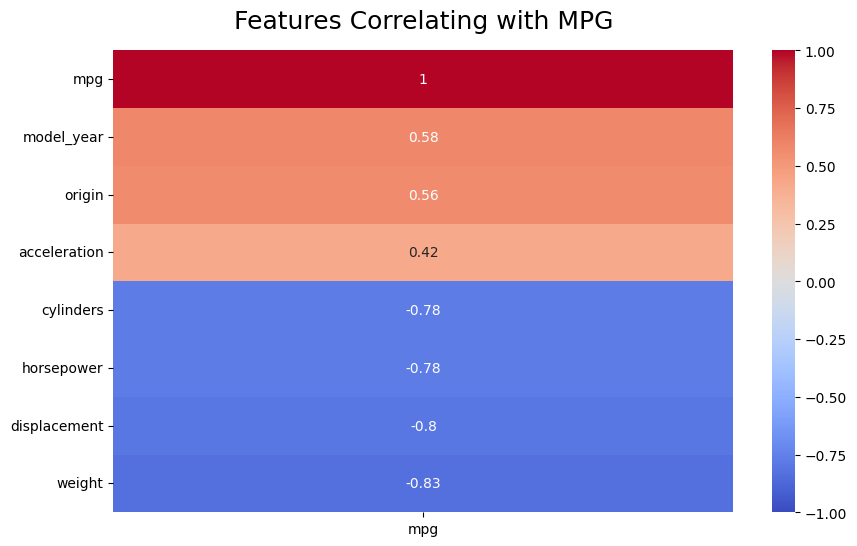

In [36]:
data_num = data1.loc[:, data1.columns != 'car_name']
print(data_num.corr())
plt.figure(figsize=(10, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(data_num.corr()))
heatmap = sns.heatmap(data_num.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')#cmap='BrBG'
plt.xticks(rotation=45)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)


plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data_num.corr()[['mpg']].sort_values(by='mpg', ascending=False), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('Features Correlating with MPG', fontdict={'fontsize':18}, pad=16);

C:\Users\Ruize Ma\anaconda3\envs\data1030\Lib\site-packages\numpy\linalg\linalg.py:2139: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


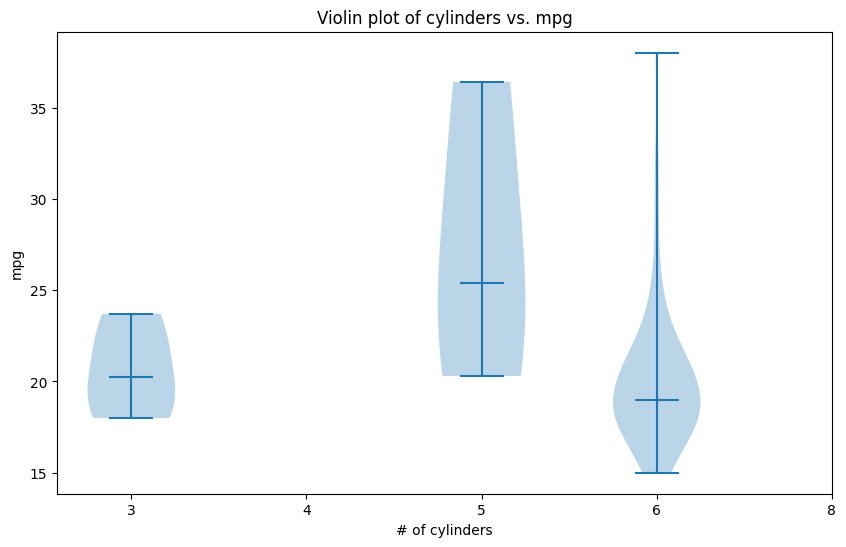

In [37]:
dataset = [data1[data1['cylinders']== 3.0]['mpg'].values,
           data1[data1['cylinders']== 4.0]['mpg'].values,
           data1[data1['cylinders']== 5.0]['mpg'].values,
           data1[data1['cylinders']== 6.0]['mpg'].values,
           data1[data1['cylinders']== 8.0]['mpg'].values]

plt.figure(figsize=(10,6))

plt.violinplot(dataset = dataset, showmedians = True, showextrema = True)
plt.xticks([1, 2, 3, 4, 5],['3','4', '5', '6', '8'])
plt.title('Violin plot of cylinders vs. mpg')
plt.xlabel('# of cylinders')
plt.ylabel('mpg')
plt.show()

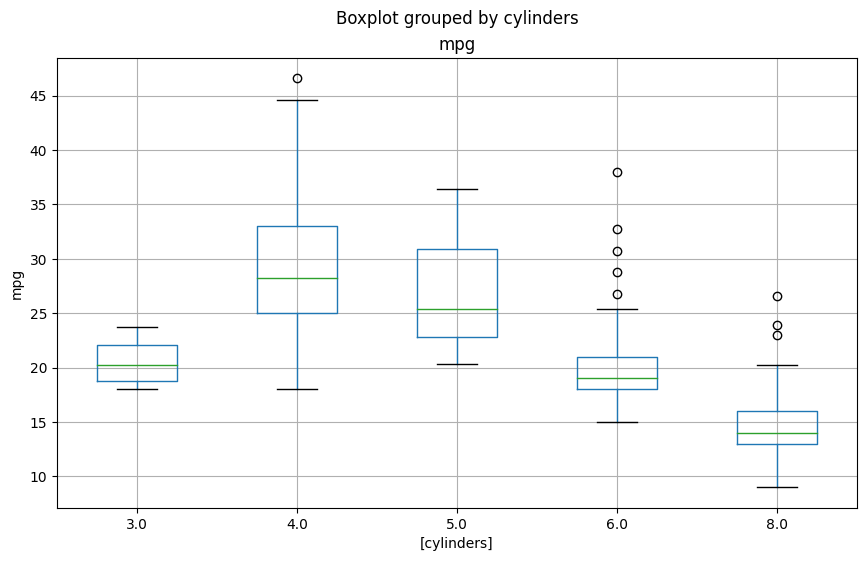

In [38]:
data1[['mpg','cylinders']].boxplot(by='cylinders',figsize=(10, 6))
plt.ylabel('mpg')
plt.show()

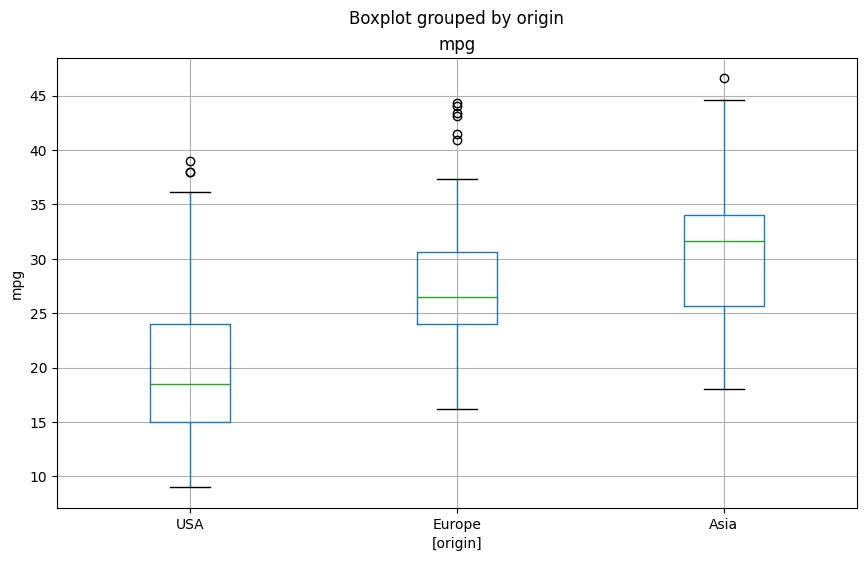

In [39]:
data1[['mpg','origin']].boxplot(by='origin',figsize=(10, 6))
plt.xticks([1, 2, 3], ['USA', 'Europe', 'Asia'])
plt.ylabel('mpg')
plt.show()

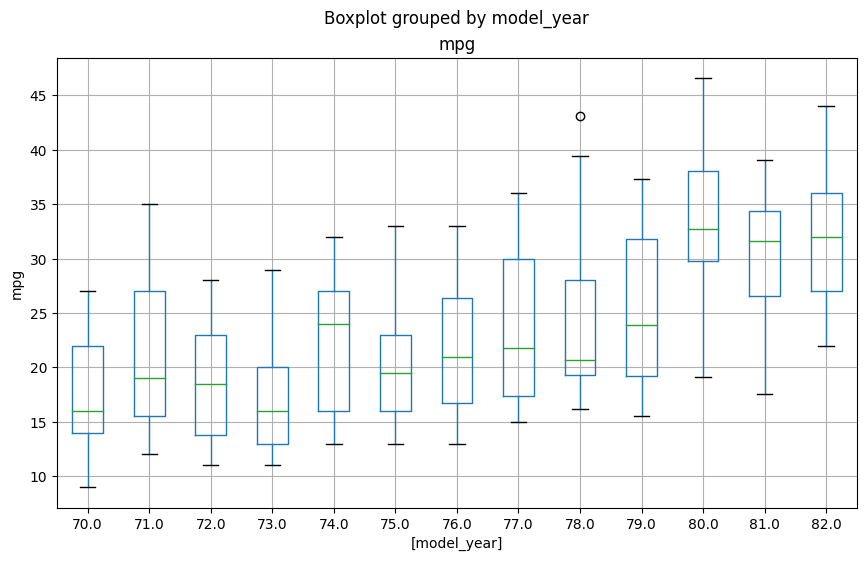

In [40]:
data1[['mpg','model_year']].boxplot(by='model_year',figsize=(10, 6))
plt.ylabel('mpg')
plt.show()

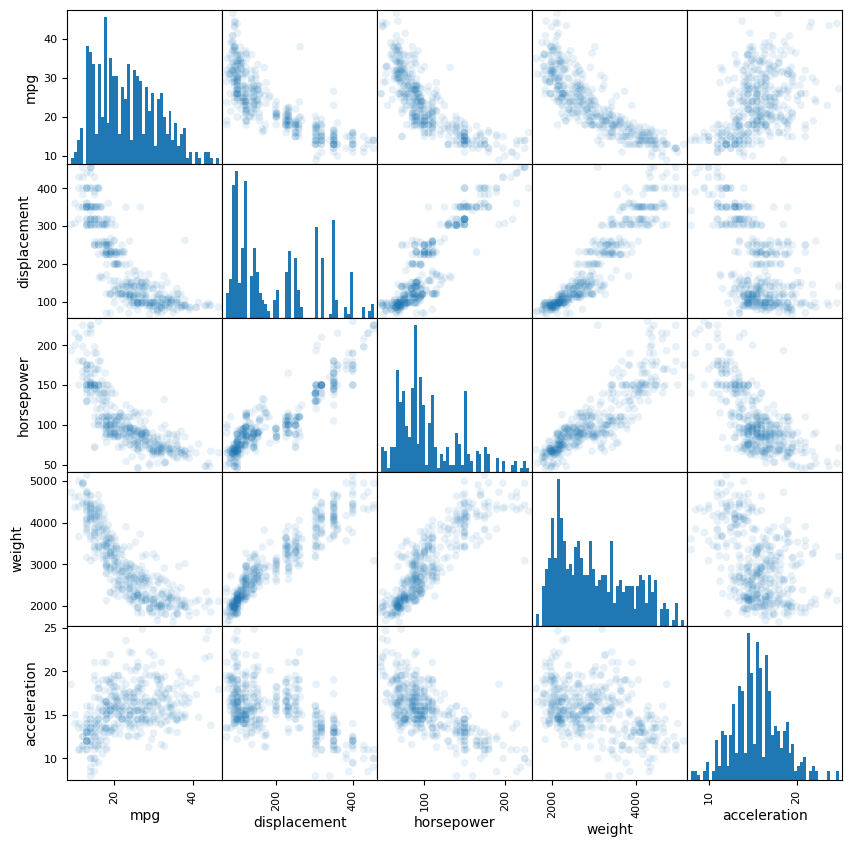

In [41]:
data_scatter = data1[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']]
pd.plotting.scatter_matrix(data_scatter, figsize=(10, 10), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.show()

In [42]:
# print(data1.shape)
# data1 = data1.dropna()
# print(data1.shape)
# print("The number of usefull data after we process is ", data1.size)

**Split and Prepocess**


In [56]:
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
random_state =42

# first split to separate out the test set
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,random_state=random_state)
print('Basic split shape:')
print(X_other.shape,y_other.shape)
print('test set:',X_test.shape,y_test.shape)
print()

#prepare to transform
num_ftrs = ['displacement', 'horsepower', 'weight', 'acceleration']
cat_ftrs = ['cylinders', 'origin']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value=0)),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs)])





# do KFold split on other
kf = KFold(n_splits=5,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]

    #prepocess the train set in the for loop
    X_prep = preprocessor.fit_transform(X_train)
    # the feature names after fit
    feature_names = preprocessor.get_feature_names_out()
    df_train = pd.DataFrame(data=X_prep,columns=feature_names)
    print(df_train.shape)
    df_val = preprocessor.transform(X_val)
    df_val = pd.DataFrame(data=df_val,columns = feature_names)

    #check the size
    print('   training set:',df_train.shape, y_train.shape) 
    print('   validation set:',df_val.shape, y_val.shape)
    print()

#prepocess the test data
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

(324, 6) (324,)
test set: (82, 6) (82,)
(259, 12)
(64, 12)
   training set: (259, 12) (259,)
   validation set: (65, 12) (65,)
(259, 12)
(64, 12)
   training set: (259, 12) (259,)
   validation set: (65, 12) (65,)
(259, 12)
(64, 12)
   training set: (259, 12) (259,)
   validation set: (65, 12) (65,)
(259, 11)
(64, 12)
   training set: (259, 11) (259,)
   validation set: (65, 11) (65,)
(260, 12)
(64, 12)
   training set: (260, 12) (260,)
   validation set: (64, 12) (64,)
(82, 12)
['num__displacement' 'num__horsepower' 'num__weight' 'num__acceleration'
 'cat__cylinders_3.0' 'cat__cylinders_4.0' 'cat__cylinders_5.0'
 'cat__cylinders_6.0' 'cat__cylinders_8.0' 'cat__origin_1' 'cat__origin_2'
 'cat__origin_3']


395    38.0
18     15.0
131    11.0
118    18.0
329    46.6
Name: mpg, dtype: float64